In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
def schedule_threshold_comb(config, step: int):
        # Schedule the remaining ratio
        total_step = config['total_step']
        initial_threshold = config['initial_threshold']
        final_threshold = config['final_threshold']
        initial_warmup = config['initial_warmup']
        final_warmup = config['final_warmup']
        # warmup_steps = config['warmup_steps']
        # warmup_steps = total_step // config['num_train_epochs']
        warmup_steps = total_step
        mask_ind = False
        if step <= initial_warmup * warmup_steps:
            threshold = initial_threshold
            mask_ind = False
        elif step > (total_step - final_warmup * warmup_steps):
            threshold = final_threshold
            mask_ind = True
        else:
            spars_warmup_steps = initial_warmup * warmup_steps
            spars_schedu_steps = (final_warmup + initial_warmup) * warmup_steps
            mul_coeff =  (step - spars_warmup_steps) / (total_step - spars_schedu_steps) 
            # threshold = final_threshold + (initial_threshold - final_threshold) * (mul_coeff ** 3)
            threshold = (initial_threshold - final_threshold) * (mul_coeff ** 3)
            mask_ind = True if step % config['deltaT'] == 0 else False
            # mask_ind = True
        return threshold, mask_ind

In [41]:
ipt_base_config = {
    "initial_threshold": 0,
    "final_threshold": 1.,
    "initial_warmup": 0.1,
    "final_warmup": 0.3, # 9
    # "warmup_steps": 120, # 58/epoch
    "beta1": 0.85, # 0.15/0.5/0.85
    "beta2": 0.95,
    "deltaT": 100,
    "pruner_name": 'PLATON',
    "total_step": 31929,
}

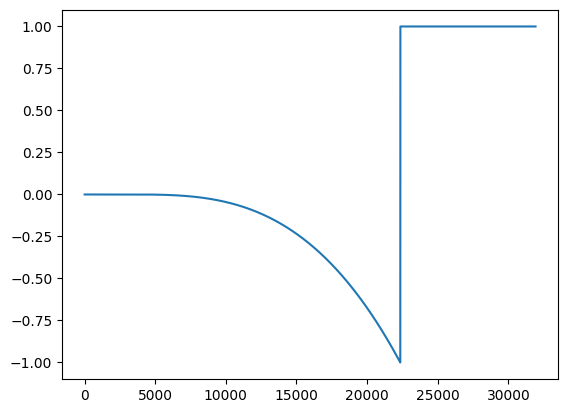

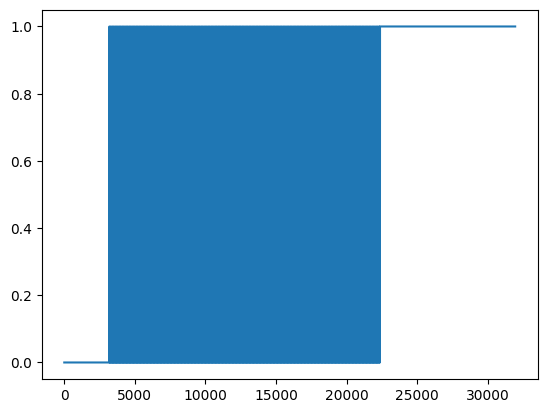

In [45]:
steps = np.arange(0, ipt_base_config['total_step'], 1)
thresholds = []
mask_inds = []
for step in steps:
    threshold, mask_ind = schedule_threshold_comb(ipt_base_config, step)
    thresholds.append(threshold)
    mask_inds.append(mask_ind)

plt.plot(steps, thresholds)
plt.show()
plt.plot(steps, mask_inds)
plt.show()

/tmp/ipykernel_3050485/2135362768.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(methods, rotation=45, ha='right', fontsize=xtick_fontsize)
/tmp/ipykernel_3050485/2135362768.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(methods, rotation=45, ha='right', fontsize=xtick_fontsize)
/tmp/ipykernel_3050485/2135362768.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_xticklabels(methods, rotation=45, ha='right', fontsize=xtick_fontsize)


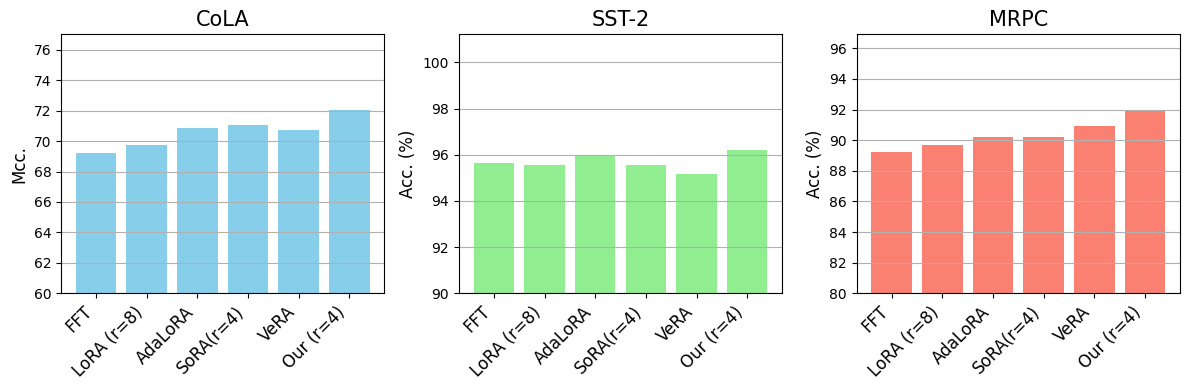

In [3]:
import matplotlib.pyplot as plt

# Data from the provided table
methods = ['FFT', 'LoRA (r=8)', 'AdaLoRA', 'SoRA(r=4)', 'VeRA', 'Our (r=4)']
params = ['184M', '1.33M', '1.27M', '0.47M', '0.16M', '0.14M']
cola = [69.21, 69.73, 70.86, 71.05, 70.74, 72.01]
sst2 = [95.64, 95.57, 95.95, 95.57, 95.18, 96.22]
mrpc = [89.22, 89.71, 90.22, 90.20, 90.93, 91.91]

# Adjusting the plots to have different starting numbers for the y-axis
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

title_fontsie = 15
ylabel_fontsize = 12
xtick_fontsize = 12
# CoLA
axs[0].bar(methods, cola, color='skyblue')
axs[0].set_title('CoLA', fontsize=title_fontsie)
axs[0].set_ylabel('Mcc.', fontsize=ylabel_fontsize)
axs[0].set_xticklabels(methods, rotation=45, ha='right', fontsize=xtick_fontsize)
axs[0].set_ylim(60, max(cola) + 5)  # Set the start number for y-axis to 60
axs[0].grid(axis='y')
# SST-2
axs[1].bar(methods, sst2, color='lightgreen')
axs[1].set_title('SST-2', fontsize=title_fontsie)
axs[1].set_ylabel('Acc. (%)', fontsize=ylabel_fontsize)
axs[1].set_xticklabels(methods, rotation=45, ha='right', fontsize=xtick_fontsize)
axs[1].set_ylim(90, max(sst2) + 5)  # Set the start number for y-axis to 90
axs[1].grid(axis='y')
# MRPC
axs[2].bar(methods, mrpc, color='salmon')
axs[2].set_title('MRPC', fontsize=title_fontsie)
axs[2].set_ylabel('Acc. (%)', fontsize=ylabel_fontsize)
axs[2].set_xticklabels(methods, rotation=45, ha='right', fontsize=xtick_fontsize)
axs[2].set_ylim(80, max(mrpc) + 5)  # Set the start number for y-axis to 80
axs[2].grid(axis='y')
# Display the plot

plt.tight_layout()
# plt.show()

plt.savefig('3datasets.png', \
            dpi=300, bbox_inches='tight', pad_inches=0.02)